# BEATS TDR Chapter 07f_d: flux density @ sample
______________________________________________________

Author:         Gianluca Iori (gianthk.iori@gmail.com)

Created on:   22/02/2020

Last update:  04/04/2020
______________________________________________________


In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy import constants
from pandas_ods_reader import read_ods
from matplotlib.ticker import ScalarFormatter
import h5py

In [113]:
%matplotlib inline

## White beam flux in 1x1mm^2 @ sample - XOP and Shadow simulations

Source flux file from a XOP simulation is available as .CSV ('3PW_flux.csv')
The file 'BEATS_BL_Flux_density_WB.csv' collects results from Shadow (rays through a pinhole at the sample position) for different photon energies and three different Hor. apertures of the primary slits (OPEN, 1mm, 0.5mm)

In [114]:
# read CSV file with Shadow results
names = ['E', 'E0', 'E1', 'I_20', 'FWHM_X', 'FWHM_Z', 'I', 'n']
# the last two columns are the intensity (or n. of good rays, I) and the Tot. rays (n)
FluxDensityWB_filecsv = 'Oasys/BEATS_BL_Flux_density_WB.csv'
FluxDensityWB = pd.read_csv(FluxDensityWB_filecsv, sep=',', names=names, skiprows=[0, 1, 2, 3, 4, 5])
# FluxDensityWB.info()
# FluxDensityWB.head()

In [144]:
FluxDensityWB['E'][23]

'5000'

In [146]:
# read CSV file with three-pole wiggler flux from XOP
fluxdata = pd.read_csv('Oasys/3PW_flux.csv', sep=',', names=['E', 'F'], skiprows=[0])
# Sample XOP flux data @ the energies used for the Shadow simulation
F_source = np.zeros((18),dtype=np.float)
for i in range(0, 18):
    F_source[i] = fluxdata['F'][np.argmin(np.abs(float(FluxDensityWB['E'][i])-fluxdata['E']))]

F_source2 = np.zeros((10),dtype=np.float)
for i in range(0, 10):
    F_source2[i] = fluxdata['F'][np.argmin(np.abs(float(FluxDensityWB['E'][23+i])-fluxdata['E']))]

In [148]:
# Flux_density_WB = Flux_XOP * (n. good rays / Tot. rays)
Flux_d_1mrad = F_source*FluxDensityWB['I'][0:18].astype('float')/FluxDensityWB['n'][0:18].astype('float')
Flux_d_1mm = F_source2*FluxDensityWB['I'][23:33].astype('float')/FluxDensityWB['n'][23:33].astype('float')
Flux_d_05mm = F_source2*FluxDensityWB['I'][38:48].astype('float')/FluxDensityWB['n'][38:48].astype('float')

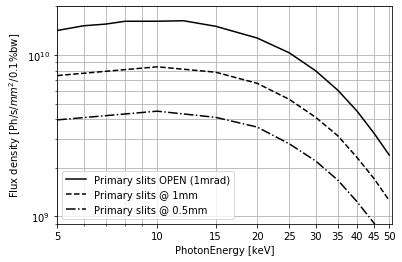

In [160]:
# plot of the flux @ 43m
f, ax = plt.subplots()
plt.plot(1e-3*FluxDensityWB['E'][0:18].astype('float'), Flux_d_1mrad, 'k')
plt.plot(1e-3*FluxDensityWB['E'][23:33].astype('float'), Flux_d_1mm, '--k')
plt.plot(1e-3*FluxDensityWB['E'][38:48].astype('float'), Flux_d_05mm, '-.k')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(xlim=(5, 51), ylim=(9e8, 2e10))
plt.xticks(np.arange(5, 55, 5))
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('PhotonEnergy [keV]')
plt.ylabel('Flux density [Ph/s/$mm^2$/0.1%bw]')
plt.grid(True, which="both")
plt.legend(['Primary slits OPEN (1mrad)', 'Primary slits @ 1mm', 'Primary slits @ 0.5mm'], loc='lower left')
# f.savefig("BEATS_WB_flux_density_primary_slits.png", bbox_inches='tight', dpi=600)

## Pink beam with filters - XOP and Shadow simulations

Transmissivity files were calculated with the Power widget in XOP and for different filter settings:
- Al [0.1, 0.2, 0.5, 1.0] [mm]
- Cu [10, 20, 50] [um]
- Fe [10, 50] [um]
- Pd [75 um]
- Graphite [5, 20] [mm]
- Diamond [0.7 mm]
- Air [1 m]

In [167]:
filters=['E', '100umAl', '200umAl', '500umAl', '1mmAl', '10umCu', '20umCu', '50umCu', '10umFe', '50umFe', '75umPd', '5mmGraphite', '20mmGraphite', '700umCVD', '1mAir']

In [168]:
# read CSV trasnmissivity file
transmissivity = pd.read_csv('Oasys/transmissivity_BEATS_filters.csv', sep=',', names=filters, skiprows=[0])

In [169]:
# Sample transmissivity data @ the energies used for the Shadow simulation
T_data = np.zeros((18,15),dtype=np.float)
for i in range(0, 18):
    T_data[i,:] = transmissivity.loc[np.argmin(np.abs(float(FluxDensityWB['E'][i])-transmissivity['E']))]

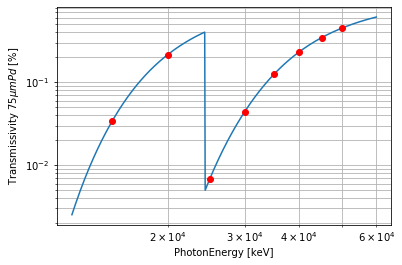

In [221]:
# check plot of the transmissivity of one filter
f, ax = plt.subplots()
plt.plot(transmissivity['E'][200:], transmissivity['75umPd'][200:])
plt.plot(T_data[10:,0], T_data[10:,10], 'or')
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('PhotonEnergy [keV]')
plt.ylabel('Transmissivity $75 \mu m Pd$ [%]')
plt.grid(True, which="both")

### plots of the FILTERED pink beam flux @ 43m

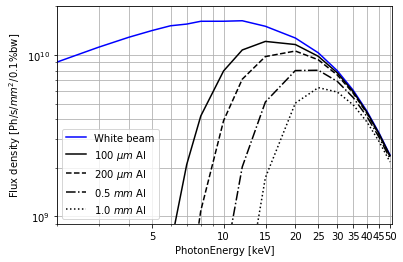

In [211]:
# Al FILTERS
f, ax = plt.subplots()
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad, 'b')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_data[:,1], 'k')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_data[:,2], '--k')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_data[:,3], '-.k')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_data[:,4], ':k')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(xlim=(2, 51), ylim=(9e8, 2e10))
plt.xticks(np.arange(5, 55, 5))
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('PhotonEnergy [keV]')
plt.ylabel('Flux density [Ph/s/$mm^2$/0.1%bw]')
plt.grid(True, which="both")
plt.legend(['White beam','100 $\mu m$ Al', '200 $\mu m$ Al', '0.5 $mm$ Al', '1.0 $mm$ Al'], loc='lower left')
f.savefig("BEATS_PinkBeam_flux_density_Al-filter.png", bbox_inches='tight', dpi=600)

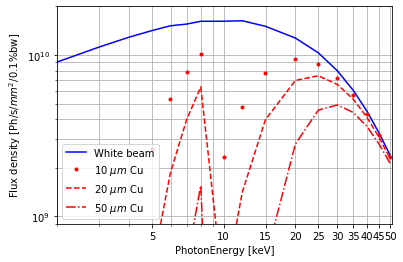

In [226]:
# Cu FILTERS
f, ax = plt.subplots()
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad, 'b')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_data[:,5], '.r')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_data[:,6], '--r')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_data[:,7], '-.r')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(xlim=(2, 51), ylim=(9e8, 2e10))
plt.xticks(np.arange(5, 55, 5))
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('PhotonEnergy [keV]')
plt.ylabel('Flux density [Ph/s/$mm^2$/0.1%bw]')
plt.grid(True, which="both")
plt.legend(['White beam','10 $\mu m$ Cu', '20 $\mu m$ Cu', '50 $\mu m$ Cu'], loc='lower left')
f.savefig("BEATS_PinkBeam_flux_density_Cu-filter.png", bbox_inches='tight', dpi=600)

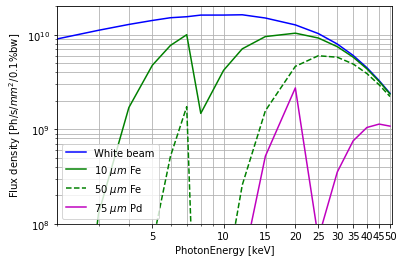

In [227]:
# Fe and Pd FILTERS
f, ax = plt.subplots()
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad, 'b')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_data[:,8], 'g')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_data[:,9], '--g')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_data[:,10], 'm')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(xlim=(2, 51), ylim=(1e8, 2e10))
plt.xticks(np.arange(5, 55, 5))
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('PhotonEnergy [keV]')
plt.ylabel('Flux density [Ph/s/$mm^2$/0.1%bw]')
plt.grid(True, which="both")
plt.legend(['White beam','10 $\mu m$ Fe', '50 $\mu m$ Fe', '75 $\mu m$ Pd'], loc='lower left')
f.savefig("BEATS_PinkBeam_flux_density_Fe-Pd-filter.png", bbox_inches='tight', dpi=600)

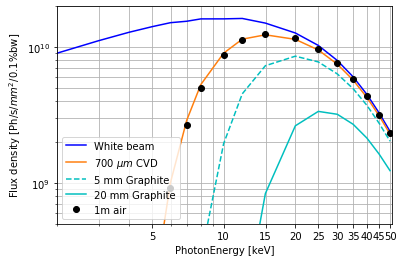

In [236]:
# C and air FILTERS
f, ax = plt.subplots()
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad, 'b')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_data[:,13], 'C1')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_data[:,11], '--c')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_data[:,12], 'c')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_data[:,14], 'ok')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(xlim=(2, 51), ylim=(5e8, 2e10))
plt.xticks(np.arange(5, 55, 5))
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('PhotonEnergy [keV]')
plt.ylabel('Flux density [Ph/s/$mm^2$/0.1%bw]')
plt.grid(True, which="both")
plt.legend(['White beam','700 $\mu m$ CVD', '5 mm Graphite', '20 mm Graphite', '1m air'], loc='lower left')
f.savefig("BEATS_PinkBeam_flux_density_C-air-filter.png", bbox_inches='tight', dpi=600)

## REDO this after final DMM choice
## Flux density @ sample after monochromator - Primary slits OPEN

In [4]:
# read CSV file with shadow results
names = ['E', 'E0', 'E1', 'theta', 'F', 'X', 'Y', 'F_mm2', 'F_mm2_1BW',  'n', 'h', 'BW', '/']
BLflux_filecsv = '/home/gianthk/Oasys/BEATS/BEATS_BL_Oasys/BEATS_BL_Flux_density.csv'
BLfluxdata = pd.read_csv(BLflux_filecsv, sep=',', names=names, skiprows=[0, 1, 2, 3, 4, 5])
# BLfluxdata.info()

In [5]:
BLfluxdata.head()

,E,E0,E1,theta,F,X,Y,F_mm2,F_mm2_1BW,n,h,BW,/
0,5000,4900,5100,2.4470,1.510000e+10,4000,5000,7.530000e+08,2.490000e+08,2000000.0,42.061,3.02,NaN
1,7000,6860,7140,1.7476,5.620000e+11,4000,5000,2.810000e+10,9.100000e+09,2000000.0,30.039,3.09,NaN
2,10000,9800,10200,1.2216,2.150000e+12,4000,5000,1.070000e+11,3.600000e+10,2000000.0,20.998,2.98,NaN
3,11000,10780,11220,1.1104,1.390000e+12,4000,5000,6.960000e+10,2.260000e+10,2000000.0,19.086,3.08,NaN
4,15000,14700,15300,0.8161,2.120000e+12,4000,5000,1.060000e+11,3.360000e+10,2000000.0,14.028,3.15,NaN


#### Flux density @ DMM bw plot

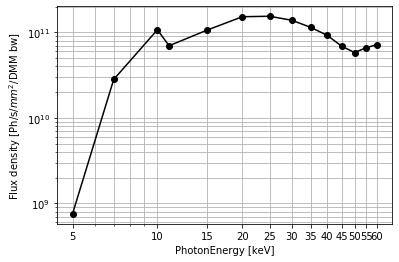

In [43]:
f, ax = plt.subplots()
plt.plot(1e-3*BLfluxdata['E'][:14].astype('float'), BLfluxdata['F_mm2'][:14].astype('float'), '-ok')
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('PhotonEnergy [keV]')
plt.ylabel('Flux density [Ph/s/$mm^2$/DMM bw]')

plt.xticks(np.arange(5, 65, 5))
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.grid(True, which="both")
f.savefig("BEATS_DMM_flux_density.png", bbox_inches='tight', dpi=600)

#### Flux density in 1%BW plot

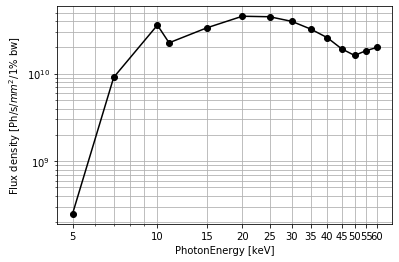

In [42]:
f, ax = plt.subplots()
plt.plot(1e-3*BLfluxdata['E'][:14].astype('float'), BLfluxdata['F_mm2_1BW'][:14].astype('float'), '-ok')
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('PhotonEnergy [keV]')
plt.ylabel('Flux density [Ph/s/$mm^2$/1% bw]')

plt.xticks(np.arange(5, 65, 5))
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.grid(True, which="both")
f.savefig("BEATS_DMM_flux_density_1%BW.png", bbox_inches='tight', dpi=600)

#### Plot of DMM BW vs energy

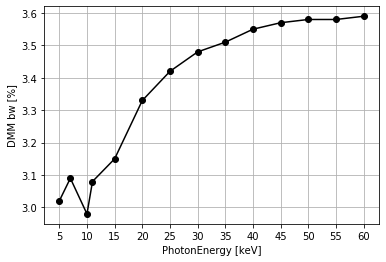

In [45]:
f, ax = plt.subplots()
plt.plot(1e-3*BLfluxdata['E'][:14].astype('float'), BLfluxdata['BW'][:14].astype('float'), '-ok')
plt.xlabel('PhotonEnergy [keV]')
plt.ylabel('DMM bw [%]')
plt.xticks(np.arange(5, 65, 5))
plt.grid(True, which="both")
f.savefig("BEATS_DMM_bw.png", bbox_inches='tight', dpi=600)

#### DMM grazing angle

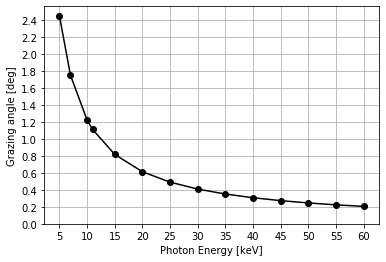

In [17]:
f, ax = plt.subplots()
plt.plot(1e-3*BLfluxdata['E'][:14].astype('float'), BLfluxdata['theta'][:14].astype('float'), '-ok')
plt.xlabel('Photon Energy [keV]')
plt.ylabel('Grazing angle [deg]')
plt.xticks(np.arange(5, 65, 5))
plt.yticks(np.arange(0, 2.6, 0.2))
plt.grid(True, which="both")
f.savefig("BEATS_DMM_grazing_angle.png", bbox_inches='tight', dpi=600)

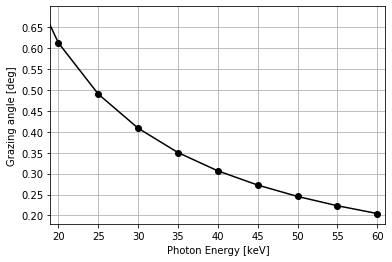

In [18]:
f, ax = plt.subplots()
plt.plot(1e-3*BLfluxdata['E'][:14].astype('float'), BLfluxdata['theta'][:14].astype('float'), '-ok')
plt.xlabel('Photon Energy [keV]')
plt.ylabel('Grazing angle [deg]')
ax.set(xlim=(19, 61), ylim=(0.18, 0.7))
plt.yticks(np.arange(0.2, 0.7, 0.05))
plt.grid(True, which="both")
f.savefig("BEATS_DMM_grazing_angle_zoom.png", bbox_inches='tight', dpi=600)

#### Vertical mirror acceptance

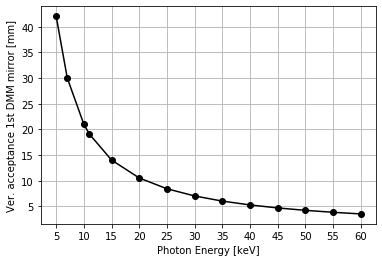

In [26]:
mirror_length = 300 # [mm]

f, ax = plt.subplots()
plt.plot(1e-3*BLfluxdata['E'][:14].astype('float'), 1e-3*mirror_length*(360*BLfluxdata['theta'][:14].astype('float')/(2*np.pi)), '-ok')
plt.xlabel('Photon Energy [keV]')
plt.ylabel('Ver. acceptance 1st DMM mirror [mm]')
plt.xticks(np.arange(5, 65, 5))
plt.grid(True, which="both")
f.savefig("BEATS_DMM_Ver_mirror_acc.png", bbox_inches='tight', dpi=600)

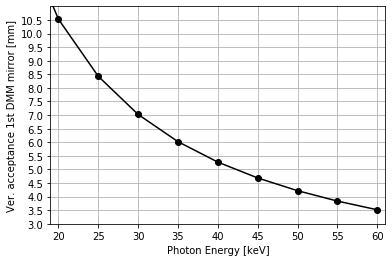

In [31]:
f, ax = plt.subplots()
plt.plot(1e-3*BLfluxdata['E'][:14].astype('float'), 1e-3*mirror_length*(360*BLfluxdata['theta'][:14].astype('float')/(2*np.pi)), '-ok')
plt.xlabel('Photon Energy [keV]')
plt.ylabel('Ver. acceptance 1st DMM mirror [mm]')
ax.set(xlim=(19, 61), ylim=(3, 11))
plt.yticks(np.arange(3, 11, 0.5))
plt.grid(True, which="both")
f.savefig("BEATS_DMM_Ver_mirror_acc_zoom.png", bbox_inches='tight', dpi=600)

## Flux density @ sample after monochromator - Primary slits @ 1mm (Hor.)
This is too demanding for Oasys on my laptop :(
Somebody know how to create a loop in Oasys?